# Probability 03 - 2D Data

In this chapter, we will use students' test scores in 2 subjects, say English and Maths, in order to explore ways of organizing 2-dimensional data.

## 1. Numerical Indicators

Whenever we have two variables that rise/fall together, we say that they are in a **positive relationship**. On the other hand, if one variable is rising while the other is falling (and vice versa) we say that the two are in a **negative relationship**. And finally, if neither of these two trends are showing, we say that the two variable are **unrelated**. The objective of this section is to find an indicator thath obeys these definitions.

### 1.1. Covariance

First, let us plot our test scores.

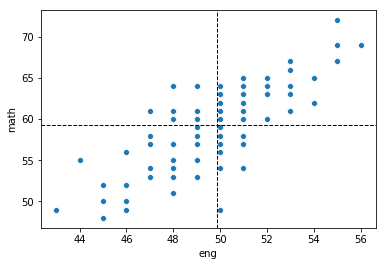

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('./03-2d-data.csv')
ax = sns.scatterplot(data=data, x='eng', y='math')
ax.axhline(data['math'].mean(), color='black', ls='--', linewidth=1)
ax.axvline(data['eng'].mean(), color='black', ls='--', linewidth=1)

When dealing with 1 variable, we defined the *variance* as the sum of the squares of the deviations of each point. This could be visualized as the area of the square formed by each point and the origin, when plotting the variable against itself. 

If we utilize the same idea in the above plot, however, we would get negative area, since we have points in the 2nd and 4th quadrants as well. If we were to add the signed areas of all points, we would get a positive value if there are more points in the 1st or 3rd quadrant, and a negative value if there are more points in the 2nd or 4th quadrant.

And this is exactly what we were looking for! More points in the 1st/3rd quadrant express a positive relationship, while more points in the 2nd/4th quadrant express a negative relationship.

With this in mind, we can define the **covariance** of two variables as:

$$
S_{xy} = \frac{1}{n}\sum_n^i{(x_i - \overline{x})(y_i - \overline{y})}
$$

Note that the covariance of $x$ with itself is simply the variance of $x$.

If we combine all the covariances in a matrix, we get:

$$
\textbf{V} = \begin{pmatrix}
S_{xx} & S_{xy} \\
S_{xy} & S_{yy}
\end{pmatrix}
$$

This is called the **covariance matrix**.

### 1.2. Correlation Coefficient

The covariance gives us a measure of the relationship between two variables, however its units are meaningless. If our data consisted of people's height and weight, we would get the covariance in $\text{m}\cdot\text{kg}$ which does not make sense.

In order to fix that, we need a statistic which doesn't depend on any particular unit. When dealing with one variable, we divided the variance by the standard deviation, so we can do the same thing this time, and divide the covariance by each of the standard deviations of the two variables. The statistic we get is called the **correlation coefficient** and is defined as:

$$
r_{xy} = \frac{S_{xy}}{S_xS_y}
$$

The correlation coefficient always takes a value between -1 and 1 - it is 1 when they are proportional to each other, -1 when they are inversely proportional and 0 when they are unrelated.

Here we can see the scatter plots for data with different correlation coefficients.

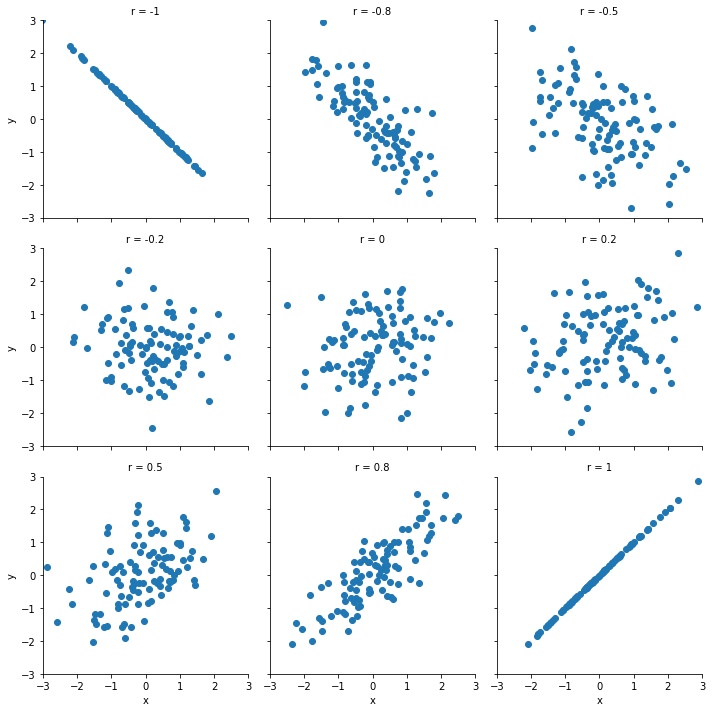

In [91]:
r_data = pd.DataFrame([], columns=['x', 'y', 'r'])
N = 100
for r in [-1, -0.8, -0.5, -0.2, 0, 0.2, 0.5, 0.8, 1]:
    df = pd.DataFrame(np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], N), columns=['x', 'y'])
    df['r'] = r
    r_data = pd.concat([r_data, df], axis=0)
g = sns.FacetGrid(data=r_data, col='r', col_wrap=3)
g.fig.set_figwidth(10)
g.fig.set_figheight(10)
for ax in g.axes.flatten():
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
g.map(plt.scatter, 'x', 'y')

## 2. Visualization

Visualizing 2-dimensional data is mostly done through **scatter plots** (often accompanied by a **regression line**) and **heatmaps**.

### 2.1. Scatter plot with a regression line

Plotting our students' scores, we get:

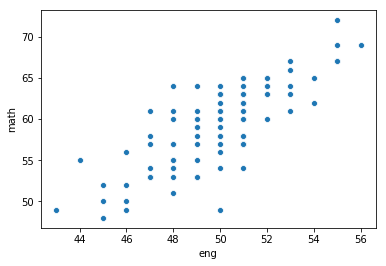

In [92]:
sns.scatterplot(data=data, x='eng', y='math')

We can see that students with a high score in English tend to have a high score in Maths as well. We can use a **regression line** to express this relationship. Taking English scores as $x$ and Maths scores as $y$, the regression line is defined as:

$$
y = \beta_0 + \beta_1x
$$

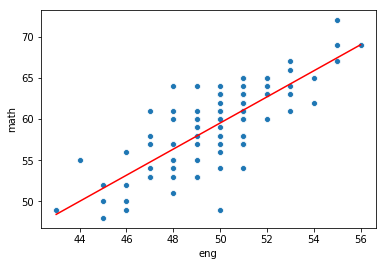

In [95]:
ax = sns.scatterplot(data=data, x='eng', y='math')
xs = np.linspace(data['eng'].min(), data['eng'].max())
ys = np.poly1d(np.polyfit(data['eng'], data['math'], 1))(xs)
ax.plot(xs, ys, color='red')

### 2.2. Heatmap

A **heatmap** is like a histogram in two dimensions. It divides the plot into colored rectangles, which serve the same purpose as bins in a histogram, where the thicker the color, the more points reside inside.

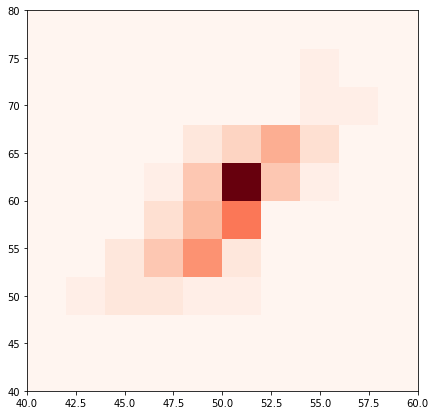

In [104]:
fig,ax = plt.subplots(1, 1, figsize=(7, 7))
_ = ax.hist2d(data['eng'], data['math'], bins=[10, 10], range=[(40, 60), (40, 80)], cmap='Reds')